# Pre-Processing

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, snowball
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from nltk.util import ngrams

nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\capta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_parquet('./Data/draft_reports.parquet')

In [3]:
df

,player,report,year,pos_x,weight,height,pos_rk,ovr_rk,grade,pos_y,age,Round,Pick
0,Alex Smith,Nephew of Michigan State head coach John L. Sm...,2005.0,QB,217.0,76.125,2.0,3.0,98.0,QB,21,1,1
2,Ronnie Brown,Brown has played second fiddle to Carnell Will...,2005.0,RB,233.0,72.250,1.0,4.0,98.0,RB,23,1,2
3,Braylon Edwards,"Edwards' father, Stanley, played at Michigan a...",2005.0,WR,211.0,74.875,1.0,1.0,99.0,WR,22,1,3
4,Cedric Benson,Benson was drafted by the Los Angeles Dodgers ...,2005.0,RB,222.0,70.500,3.0,10.0,96.0,RB,22,1,4
5,Carnell Williams,Williams started two games and played in nine ...,2005.0,RB,217.0,70.875,2.0,6.0,97.0,None,None,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,Jeff Gunter,Gunter is a versatile edge defender who lines ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OLB,23,7,252
5741,Trenton Gill,Gill has a strong leg. He led the ACC in punt ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,P,23,7,255
5742,Jesse Luketa,Luketa is a relentless run-defender who has go...,2022.0,None,NaN,NaN,NaN,NaN,NaN,LB,23,7,256
5743,Marquis Hayes,Hayes is a mauler who plays with good leverage...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OL,23,7,257


In [4]:
df.Round.value_counts()

6    656
4    654
3    639
5    619
2    573
1    565
7    503
Name: Round, dtype: Int64

In [5]:
df['target'] = None

In [9]:
df.target[df.Round == 1] = 3 

C:\Users\capta\AppData\Local\Temp\ipykernel_240\3762994471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[df.Round == 1] = 3


In [10]:
df.target[(df.Round == 2) | (df.Round == 3)] = 2 

C:\Users\capta\AppData\Local\Temp\ipykernel_240\77934495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[(df.Round == 2) | (df.Round == 3)] = 2


In [11]:
df.target[(df.Round == 4) | (df.Round == 5)] = 1 

C:\Users\capta\AppData\Local\Temp\ipykernel_240\1820849208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[(df.Round == 4) | (df.Round == 5)] = 1


In [12]:
df.target[(df.Round >= 6)] = 0 

C:\Users\capta\AppData\Local\Temp\ipykernel_240\2767481610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.target[(df.Round >= 6)] = 0


In [16]:
df.target = df.target.astype('Int64')

In [18]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stop_words_list = stopwords.words('english')
stemmer = snowball.EnglishStemmer()

In [19]:
def clean (text, tokenizer, stop_words_list,stemmer):
    lower_text = text.lower()
    token_text = tokenizer.tokenize(lower_text)
    stop_text = [word for word in token_text if word not in stop_words_list]
    stem_text = [stemmer.stem(word) for word in stop_text]
    return stem_text
    

In [20]:
report = df.report

In [21]:
text_data = report.apply(lambda x: clean(x,tokenizer, stop_words_list,stemmer))

In [23]:
df['processed_report'] = text_data

In [24]:
df

,player,report,year,pos_x,weight,height,pos_rk,ovr_rk,grade,pos_y,age,Round,Pick,target,processed_report
0,Alex Smith,Nephew of Michigan State head coach John L. Sm...,2005.0,QB,217.0,76.125,2.0,3.0,98.0,QB,21,1,1,3,"[nephew, michigan, state, head, coach, john, s..."
2,Ronnie Brown,Brown has played second fiddle to Carnell Will...,2005.0,RB,233.0,72.250,1.0,4.0,98.0,RB,23,1,2,3,"[brown, play, second, fiddl, carnel, william, ..."
3,Braylon Edwards,"Edwards' father, Stanley, played at Michigan a...",2005.0,WR,211.0,74.875,1.0,1.0,99.0,WR,22,1,3,3,"[edward, father, stanley, play, michigan, nfl,..."
4,Cedric Benson,Benson was drafted by the Los Angeles Dodgers ...,2005.0,RB,222.0,70.500,3.0,10.0,96.0,RB,22,1,4,3,"[benson, draft, los, angel, dodger, 12th, roun..."
5,Carnell Williams,Williams started two games and played in nine ...,2005.0,RB,217.0,70.875,2.0,6.0,97.0,None,None,1,5,3,"[william, start, two, game, play, nine, 2001, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,Jeff Gunter,Gunter is a versatile edge defender who lines ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OLB,23,7,252,0,"[gunter, versatil, edg, defend, line, two, thr..."
5741,Trenton Gill,Gill has a strong leg. He led the ACC in punt ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,P,23,7,255,0,"[gill, strong, leg, led, acc, punt, averag, pu..."
5742,Jesse Luketa,Luketa is a relentless run-defender who has go...,2022.0,None,NaN,NaN,NaN,NaN,NaN,LB,23,7,256,0,"[luketa, relentless, run, defend, good, shock,..."
5743,Marquis Hayes,Hayes is a mauler who plays with good leverage...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OL,23,7,257,0,"[hay, mauler, play, good, leverag, effect, cli..."


In [82]:
df

,player,report,year,pos_x,weight,height,pos_rk,ovr_rk,grade,pos_y,age,Round,Pick,target,processed_report,reportlen,joined_report
0,Alex Smith,Nephew of Michigan State head coach John L. Sm...,2005.0,QB,217.0,76.125,2.0,3.0,98.0,QB,21,1,1,3,"[nephew, michigan, state, head, coach, john, s...",173,nephew michigan state head coach john smith al...
2,Ronnie Brown,Brown has played second fiddle to Carnell Will...,2005.0,RB,233.0,72.250,1.0,4.0,98.0,RB,23,1,2,3,"[brown, play, second, fiddl, carnel, william, ...",106,brown play second fiddl carnel william through...
3,Braylon Edwards,"Edwards' father, Stanley, played at Michigan a...",2005.0,WR,211.0,74.875,1.0,1.0,99.0,WR,22,1,3,3,"[edward, father, stanley, play, michigan, nfl,...",76,edward father stanley play michigan nfl oiler ...
4,Cedric Benson,Benson was drafted by the Los Angeles Dodgers ...,2005.0,RB,222.0,70.500,3.0,10.0,96.0,RB,22,1,4,3,"[benson, draft, los, angel, dodger, 12th, roun...",111,benson draft los angel dodger 12th round high ...
5,Carnell Williams,Williams started two games and played in nine ...,2005.0,RB,217.0,70.875,2.0,6.0,97.0,None,None,1,5,3,"[william, start, two, game, play, nine, 2001, ...",170,william start two game play nine 2001 suffer b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5740,Jeff Gunter,Gunter is a versatile edge defender who lines ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OLB,23,7,252,0,"[gunter, versatil, edg, defend, line, two, thr...",42,gunter versatil edg defend line two three poin...
5741,Trenton Gill,Gill has a strong leg. He led the ACC in punt ...,2022.0,None,NaN,NaN,NaN,NaN,NaN,P,23,7,255,0,"[gill, strong, leg, led, acc, punt, averag, pu...",21,gill strong leg led acc punt averag punt plus ...
5742,Jesse Luketa,Luketa is a relentless run-defender who has go...,2022.0,None,NaN,NaN,NaN,NaN,NaN,LB,23,7,256,0,"[luketa, relentless, run, defend, good, shock,...",36,luketa relentless run defend good shock hand l...
5743,Marquis Hayes,Hayes is a mauler who plays with good leverage...,2022.0,None,NaN,NaN,NaN,NaN,NaN,OL,23,7,257,0,"[hay, mauler, play, good, leverag, effect, cli...",33,hay mauler play good leverag effect climb seco...


In [32]:
df.reportlen = df.processed_report.apply(len)

In [75]:
df.joined_processed_report = df.processed_report.str.join(" ")

In [77]:
df['joined_report'] = df.processed_report.str.join(" ")

In [88]:
freq_dist = FreqDist(df.processed_report.explode())

In [89]:
list(freq_dist.most_common(25))

[('game', 3490),
 ('tackl', 2947),
 ('play', 2761),
 ('season', 2543),
 ('start', 2332),
 ('good', 2131),
 ('pass', 2126),
 ('run', 2044),
 ('yard', 1892),
 ('speed', 1780),
 ('averag', 1742),
 ('also', 1673),
 ('one', 1673),
 ('team', 1624),
 ('nfl', 1599),
 ('size', 1546),
 ('two', 1536),
 ('get', 1492),
 ('ball', 1414),
 ('year', 1349),
 ('three', 1342),
 ('abil', 1327),
 ('end', 1317),
 ('quick', 1290),
 ('develop', 1252)]

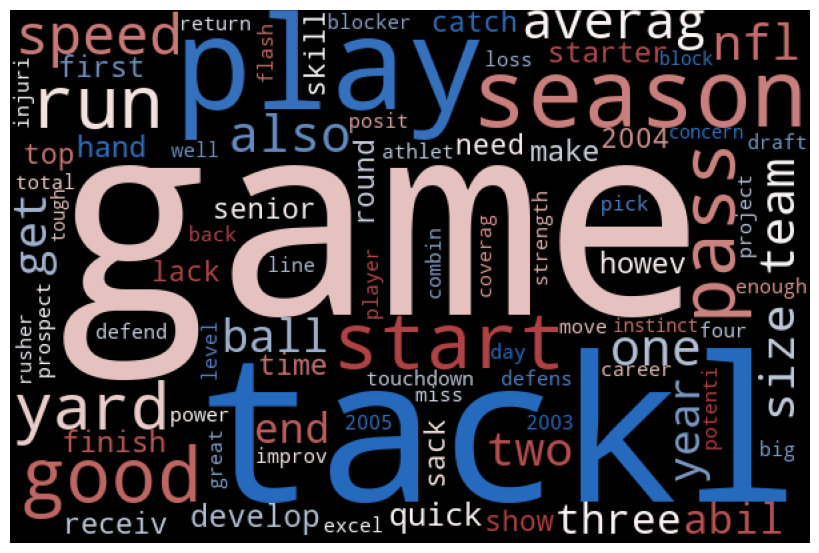

In [90]:
wordcloud = WordCloud(width = 600, height = 400,
                colormap="vlag", background_color ='black',
                min_font_size = 10, random_state = 30).generate_from_frequencies(freq_dist)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [61]:
test = pd.DataFrame(df.groupby('Round').reportlen.mean()).reset_index()
test

,Round,reportlen
0,1,67.759292
1,2,61.434555
2,3,57.716745
3,4,54.204893
4,5,51.975767
5,6,46.705793
6,7,41.560636


In [71]:
reportlength

,target,reportlen
0,0,44.472821
1,1,53.120974
2,2,59.474422
3,3,67.759292


In [44]:
reportlength = pd.DataFrame(df.groupby('target').reportlen.mean()).reset_index()

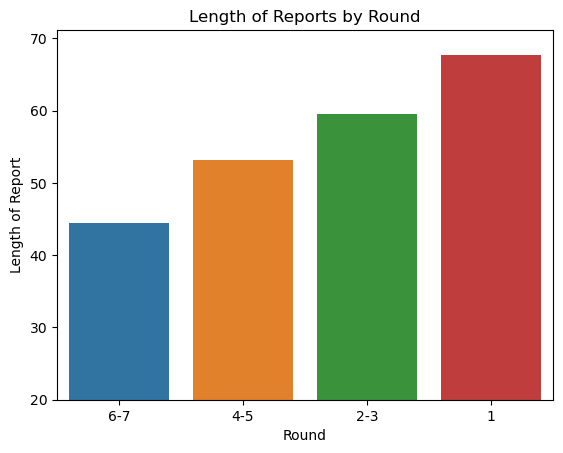

In [59]:
fig,ax = plt.subplots()
sns.barplot(x=reportlength.target,y=reportlength.reportlen)
ax.set_xticklabels(['6-7','4-5','2-3','1'])
ax.set_xlabel('Round')
ax.set_ylabel('Length of Report')
ax.set_title('Length of Reports by Round')
ax.set_ylim(bottom=20);

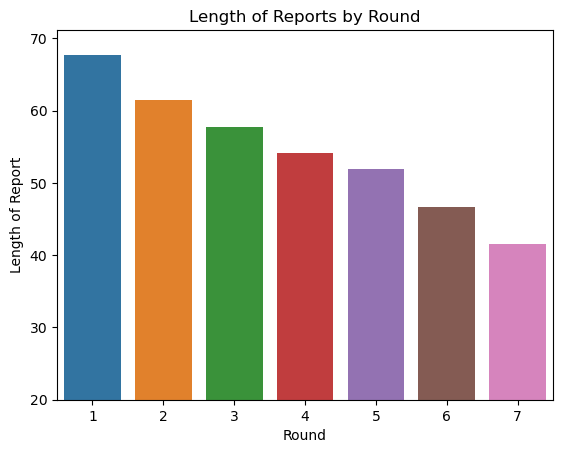

In [70]:
fig,ax = plt.subplots()
sns.barplot(x=test.Round,y=test.reportlen)
ax.set_xticklabels(['1','2','3','4','5','6','7'])
ax.set_xlabel('Round')
ax.set_ylabel('Length of Report')
ax.set_title('Length of Reports by Round')
ax.set_ylim(bottom=20);

In [ ]:
# Set up figure and axes
fig, axes = plt.subplots(nrows=4, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique genre
data_by_target = [y for _, y in data.groupby('target', as_index=False)]
for idx, genre_df in enumerate(data_by_target):
    # Find top 10 words in this genre
    all_words_in_genre = genre_df.preprocessed_text.explode()
    top_10 = all_words_in_genre.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(genre_df.iloc[0].genre.title())
    
fig.tight_layout()

In [ ]:
cv = CountVectorizer(stop_words='english',min_df=.05,max_df=.9,)
cv.fit_transform(text_data)

In [ ]:
cv.get_feature_names_out()